In [ ]:
# How could you use Q1, Q3 to determine the upper bound and lower bound for detecting outliers?

In [8]:
import numpy as np
from my_ml_package.visualize import plot_pdf, plot_cdf, plot_histogram
from my_ml_package.stat import generate_sample


 
* Basic Terminology in Statistics
  * A random experiment: "an experiment or a process for which the outcome cannot be predicted with certainty"
  * Sample space v.s. Event
  * Random Variables: "quantities of interest that are determined by the result of the experiment are known as random variable"

* Probability
  * Probability of an event
  * Joint probability v.s Conditional probability
  * Bayes Rule: "how you should change your existing beliefs in the light of new occurrence"
    + $Pr(\text{cancer=True} | \text{Test=Positive}) = \frac{Pr(\text{cancer=True}) Pr(\text{Test=Positive}|\text{cancer=True})}{Pr(\text{Test=Positive})}$
    + It can be used to calculate unknown poterior probability [in some cases](https://machinelearningmastery.com/bayes-theorem-for-machine-learning/#:~:text=It%20is%20often%20the%20case,\)%20*%20P\(not%20A\))
    + How does this Bayes rule help use build ML models?
    parameters; data

    maximize Pr(parameters|data) $\propto$ Pr(data|parameters) * Pr(parameters) 

    maximize Pr(model|data) $\propto$ Pr(data|model) * Pr(model) 


**Reference**
* Introduction to Probability and Statistics for Engineers and Scientists

## Random Variables

In [15]:
probs = [1/6, 1/6,1/6, 1/6, 1/6, 1/6]
x =     [1,   2,  3,   4,   5,   6] 

## Distributions

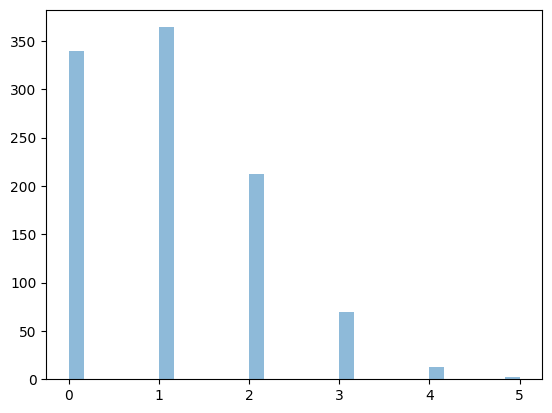

In [17]:
# plot_pdf(x, probs)
# plot_cdf(x, probs)

# Common distributions
sample = generate_sample(sample_size=1000, pdf_or_pmf=np.random.poisson)
plot_histogram(sample, bins=30)

## Central Limit Theorem
As the sample size becomes large, the distribution of the sample mean (or sum) of independent, identically distributed (i.i.d.) variables approaches a normal distribution, regardless of the original distribution of the variables.

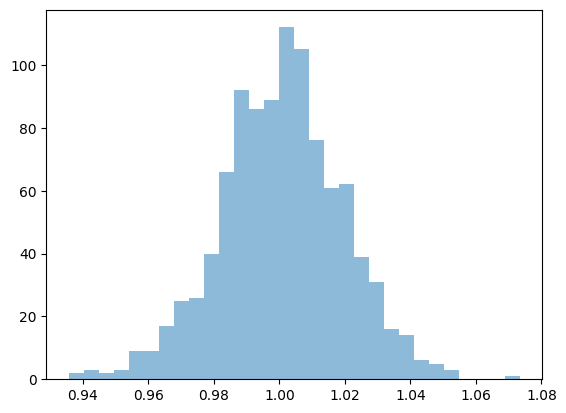

In [24]:
# 1. Large sample size; 2. Sample mean/summation-> 3. Normal distribution
# pdf: Probability Density Function-> Continuous variable; pmf: Probability Mass Function-> Categorical variable
means = [np.mean(generate_sample(sample_size=3000, pdf_or_pmf=np.random.poisson)) for _ in range(1000)]
plot_histogram(means, bins=30)

# y = wx+b # trained sample

# hypothesis testing -> t-test, z-test
# confidence interval

## InterQuartile Range

In [13]:
from my_ml_package.stat import find_position_for_percentile, find_percentile
# Example dataset
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]

Q1 = find_percentile(25, data)  # Q1
Q2 = find_percentile(50, data)  # Q2
Q3 = find_percentile(75, data)  # Q3
print(f"Q1: {Q1}")  
print(f"Q2: {Q2}")  
print(f"Q3: {Q3}")

tolerance_range = 1.5*(Q3-Q1)
lower_bound = Q1 - tolerance_range
upper_bound = Q3 + tolerance_range
# # Print the results
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")


Q1: 3
Q2: 6
Q3: 9
Lower Bound for Outliers: -6.0
Upper Bound for Outliers: 18.0
